In [5]:
!pip3 install reeds-shepp

     |████████████████████████████████| 45 kB 1.7 MB/s 
  Created wheel for reeds-shepp: filename=reeds_shepp-1.0.7-cp37-cp37m-linux_x86_64.whl size=181917 sha256=406e4ed5ae1c7b35b8070f15cbc6bf9305d5cb9d1e564c335a8136a1ac4eb1d6
  Stored in directory: /root/.cache/pip/wheels/db/8f/b0/cc244db2ac9927783f636ecb40a683cb2a39578c234dde3a86
Successfully built reeds-shepp


In [6]:
# The autoreload extension will automatically load in new code as you edit files,
# so you don't need to restart the kernel every time
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from P4_parallel_parking import ParkingRRT

plt.rcParams['figure.figsize'] = [12, 12]  # Change default figure size

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


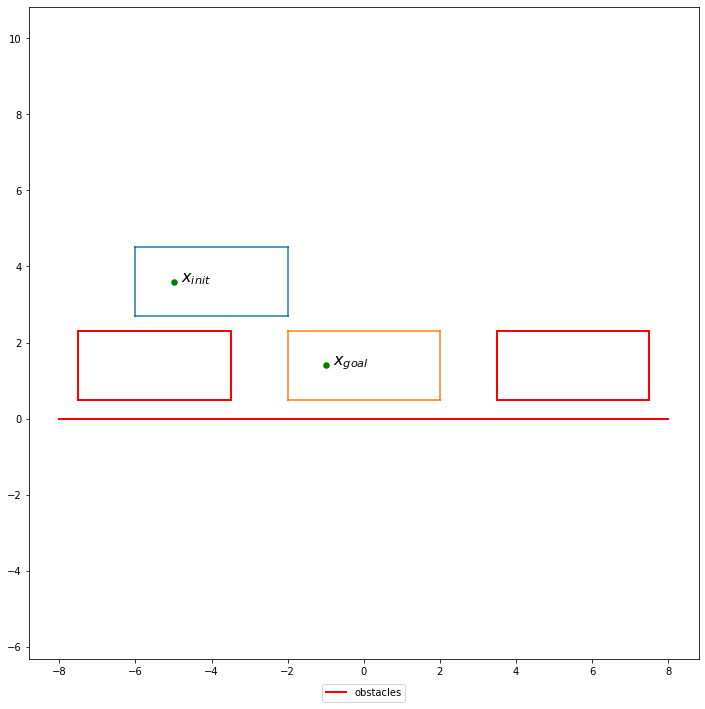

In [8]:
x_init = [-5, 3.6, 0]
x_goal = [-1, 1.4, 0]
CAR = np.array([[[-2, -0.9], [2, -0.9]], [[2, -0.9], [2, 0.9]], [[2, 0.9], [-2, 0.9]], [[-2, 0.9], [-2, -0.9]]])
PARKING_SPOT = np.concatenate([CAR + np.array([5.5, 1.4]), CAR + np.array([-5.5, 1.4]),
                               np.array([[[-8, 0], [8, 0]]])], 0)

pp_rrt = ParkingRRT([-5, 0, -np.pi / 3], [5, 4, np.pi / 3], x_init, x_goal, PARKING_SPOT)
pp_rrt.plot_problem()

True

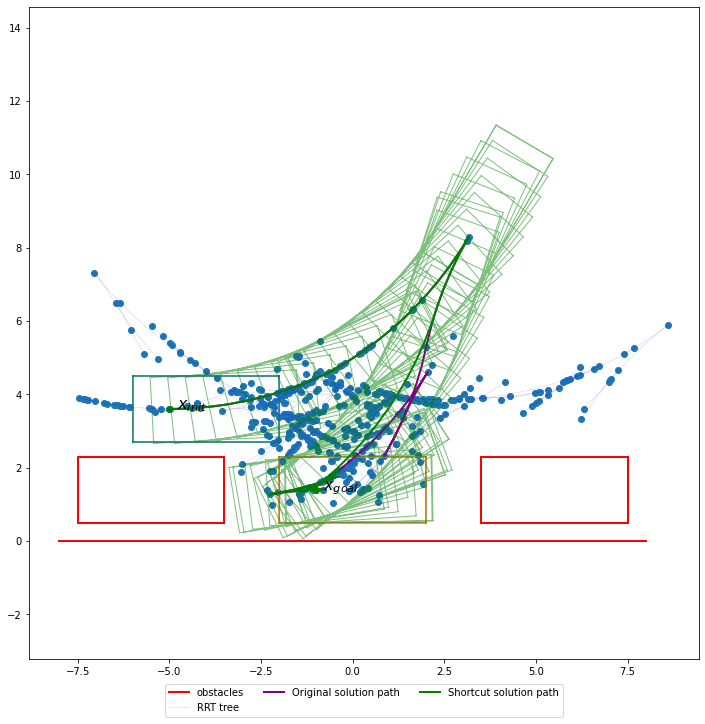

In [23]:
# RRT is a randomized algorithm; even though this planning problem is feasible, with a finite number of samples
# success is not guaranteed (though we see that with 1000 samples it seems to work more often than not). It's fun
# to see the different solutions RRT comes up with, but for debugging you may wish to use the fixed seed below.
#np.random.seed(1235)
pp_rrt.solve(5, 2000, shortcut=True)